<a href="https://colab.research.google.com/github/Zefandion/Capstone-Project_CC25-CR388/blob/main/Prediksi_Penyakit_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Memuat Dataset

Submber: https://www.kaggle.com/datasets/717451f4573e9c3d8963e626808ade67a89fbd2ee660be008c1aba16b2a2345a

In [ ]:
# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Data Loading

In [ ]:
# Tampilkan 5 data teratas untuk memastikan
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Statistik deskriptif untuk data numerik
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

# Tipe data setiap kolom
print("\nTipe data per kolom:")
print(df.dtypes)

Jumlah baris dan kolom: (100000, 9)

Tipe data per kolom:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


# Cleaning

In [ ]:
# Cek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Periksa data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 3854


Atasi data duplicate

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
# Periksa data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [ ]:
# Ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (96146, 9)


# Menangani Outliers

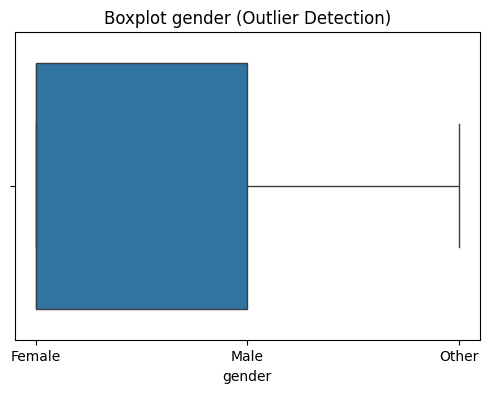

In [ ]:
# Deteksi dan tangani outlier
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['gender'])
plt.title('Boxplot gender (Outlier Detection)')
plt.show()

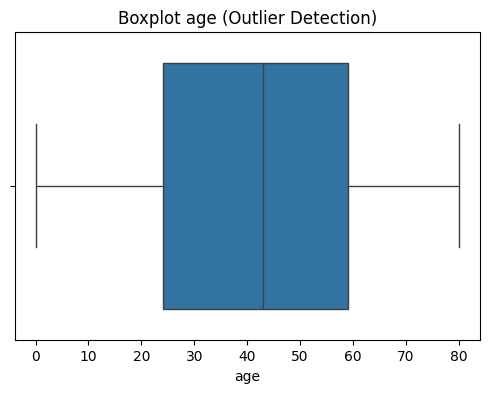

In [ ]:
# Deteksi dan tangani outlier
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'])
plt.title('Boxplot age (Outlier Detection)')
plt.show()

# Data Splitting

In [ ]:
# Atau menggunakan replace
df['gender_encoded_replace'] = df['gender'].replace(['Male', 'Female'], [1, 0])

In [ ]:
# Atau menggunakan replace
df['smoking_status'] = df['smoking_history'].replace(['Male', 'Female'], [1, 0])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded_replace
0,Female,80.0,0,1,never,25.19,6.6,140,0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,1


In [ ]:
# Tentukan fitur (X) dan target (y)
# Target yang diprediksi adalah 'diabetes'

# X should contain the features (the numerical columns)
X = df[['gender_encoded_replace', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
# y should contain the target (the 'diabetes' column)
y = df['diabetes']

# Encode the target variable using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) # Transform y into numerical labels

# Split data menjadi train dan test (80% train, 20% test)
# Use the encoded target variable y_encoded
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) # Added stratify for balanced split

# Tampilkan ukuran data
print(f'Jumlah data latih: {X_train.shape[0]}')
print(f'Jumlah data uji: {X_test.shape[0]}')

KeyError: "['smoking_history'] not in index"

Dataset dibagi menjadi 80% data latih dan 20% data uji.

# Model Development

## Random Forest

In [ ]:
# Inisialisasi model
model_rf = RandomForestClassifier(random_state=42)

# Latih model Random Forest
model_rf.fit(X_train, y_train_encoded)

ValueError: could not convert string to float: 'Other'